In [209]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
# from matplotlib import imshow

# r,g,b = img.getpixel((0,0))  -- Getting Pixel Value
# img.putpixel((0,0),(r,g,b))  -- Inserting Pixel Value
# plt.subplots(nrows=2, ncols=2, figsize=(20, 20)) -- Plotting reconstructed image together with its indexed image


In [210]:
def color_map_f(indexed_img):
  color_map = {}
  count = 0
  for i, row in enumerate(indexed_img):
    for pixel in row:
      rgb = (pixel[0], pixel[1], pixel[2]) 
      try:
        value = color_map[rgb]
      except KeyError:
        color_map[rgb] = count
        count +=1 
      else:
        continue
  return color_map


In [211]:
def index_map_f(indexed_img, color_map):
  index_map = []
  for i,row in enumerate(indexed_img):
    row_array = []
    for pixel in row:
      rgb = (pixel[0], pixel[1], pixel[2])
      value = color_map[rgb]
      row_array.append(value)
    index_map.append(row_array)
  return index_map


In [255]:
def calculate_color_map():
  im = Image.open("/Users/ahmedwasfy/Documents/UNI/CV/Asignment 1/Test Image.jpg")
  indexed_img = np.asarray(im)
  
  color_map = color_map_f(indexed_img)
  index_map = index_map_f(indexed_img, color_map)
  return color_map, index_map


In [213]:
def less_than(new_color, max_range):
  for i in range(3):
    if new_color[i] >= max_range[i]:
      return False
  return True

In [214]:
def greater_than(new_color, min_range):
  for i in range(3):
    if new_color[i] <= min_range[i]:
      return False
  return True


In [215]:
def compare(min_range, max_range, new_color):
  # greater = np.greater_equal(new_color, min_range) 
  # less = np.less_equal(new_color, max_range)
  greater = greater_than(new_color, min_range)
  less = less_than(new_color, max_range)
  if greater == True and  less == True:
    return True
  else:
    return False
  
  # print(f_bool)   
  # # print(results)
  # print(greater)
  # print(less)
  # # for result in results:
  # #   print(result)
  # #   if (result == False):
  # #     return False
 


In [216]:
def list_to_dict1(new_color_map):
    new_color_map_dict = {}
    for color in new_color_map:
        new_color_map_dict[color[0]] = color[1] 
    return new_color_map_dict

In [217]:
def quantization_levels2(color_map_q, diff):
    new_color_map = []
    discarded_color_map = {}
    diff = (diff, diff, diff)
    count_q = 0
    for color in color_map_q:
        if count_q == 0:
            new_color_map.append([color , color_map_q[color]])
            count_q += 1
        else:
            loop_bool = True 
            for i,new_color in enumerate(new_color_map):
                if(color not in new_color_map[i]):
                    loop_bool = True
                else:
                    loop_bool = False
            if (loop_bool):
                discard_bool = True 
                index = 0
                for i, new_color in enumerate(new_color_map):
                    max_range = np.add(new_color[0], diff)
                    min_range = np.subtract(new_color[0], diff)
                    if (compare(min_range, max_range, color)):
                        discard_bool = True
                        index = new_color[1]
                        break
                    else:
                         discard_bool = False
#                 break
                if (discard_bool):
                    discarded_color_map[color_map_q[color]] = index
                else:
                    new_color_map.append([color, color_map_q[color]])
                    count_q += 1
    new_color_map = list_to_dict1(new_color_map)        
    return new_color_map, discarded_color_map
    




In [284]:
def adjust_index(index_map, removed_colors):
    new_index_map = index_map
    for i,row in enumerate(new_index_map):
        for j,pixel in enumerate(row):
            try:
                new_index_map[i][j] = removed_colors[pixel]
            except KeyError:
                continue
    return new_index_map

In [286]:
def reverse_color_map(color_map):
    reversed_color_map = {}  
    for color in color_map:
        reversed_color_map[color_map[color]] = color
    return reversed_color_map
        

In [288]:
def color_map_to_image(index_map, color_map):
    image = index_map
    reversed_map = reverse_color_map(color_map)
    print(reversed_map)
    for i,row in enumerate(index_map):
        for j, pixel in enumerate(row):
#             print(pixel)
            image[i][j] = reversed_map[pixel]
    return image
    

In [283]:
color_map_final, index_map_final = calculate_color_map()
new_color_map, discarded_color_map = quantization_levels2(color_map_final, 10)

# print(color_map_final)
print(new_color_map)
print(discarded_color_map)


{(2, 10, 49): 0, (0, 20, 57): 15, (4, 30, 67): 25, (1, 41, 77): 42, (9, 53, 90): 50, (3, 63, 100): 76, (8, 73, 111): 90, (3, 82, 121): 108, (5, 90, 131): 120, (4, 97, 141): 177, (10, 107, 150): 624, (2, 95, 152): 721, (14, 120, 162): 730, (17, 113, 111): 754, (35, 129, 141): 755, (9, 112, 129): 784, (31, 139, 141): 785, (94, 209, 114): 786, (101, 212, 143): 787, (58, 163, 133): 788, (0, 92, 118): 816, (23, 136, 106): 821, (63, 184, 117): 822, (73, 200, 69): 823, (67, 193, 86): 824, (45, 164, 100): 825, (18, 128, 117): 826, (0, 112, 90): 852, (29, 150, 79): 853, (54, 184, 75): 855, (42, 171, 71): 856, (8, 108, 170): 861, (22, 140, 82): 882, (54, 182, 87): 885, (22, 149, 58): 887, (0, 107, 149): 896, (0, 103, 100): 932, (8, 127, 99): 933, (24, 147, 100): 934, (10, 84, 149): 1000, (17, 101, 127): 1006, (43, 150, 106): 1008, (43, 165, 88): 1009, (44, 183, 84): 1010, (24, 173, 71): 1012, (12, 158, 60): 1013, (65, 182, 77): 1016, (75, 174, 146): 1042, (72, 169, 128): 1043, (65, 162, 108): 10

In [285]:
quantized_index_map = adjust_index(index_map_final, discarded_color_map)
print(quantized_index_map)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 50, 50, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 76, 50, 50, 50, 50, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 90, 90, 90, 76, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 108, 108, 108, 108, 10

In [287]:
reversed_map = reverse_color_map(new_color_map)
print(reversed_map)


{0: (2, 10, 49), 15: (0, 20, 57), 25: (4, 30, 67), 42: (1, 41, 77), 50: (9, 53, 90), 76: (3, 63, 100), 90: (8, 73, 111), 108: (3, 82, 121), 120: (5, 90, 131), 177: (4, 97, 141), 624: (10, 107, 150), 721: (2, 95, 152), 730: (14, 120, 162), 754: (17, 113, 111), 755: (35, 129, 141), 784: (9, 112, 129), 785: (31, 139, 141), 786: (94, 209, 114), 787: (101, 212, 143), 788: (58, 163, 133), 816: (0, 92, 118), 821: (23, 136, 106), 822: (63, 184, 117), 823: (73, 200, 69), 824: (67, 193, 86), 825: (45, 164, 100), 826: (18, 128, 117), 852: (0, 112, 90), 853: (29, 150, 79), 855: (54, 184, 75), 856: (42, 171, 71), 861: (8, 108, 170), 882: (22, 140, 82), 885: (54, 182, 87), 887: (22, 149, 58), 896: (0, 107, 149), 932: (0, 103, 100), 933: (8, 127, 99), 934: (24, 147, 100), 1000: (10, 84, 149), 1006: (17, 101, 127), 1008: (43, 150, 106), 1009: (43, 165, 88), 1010: (44, 183, 84), 1012: (24, 173, 71), 1013: (12, 158, 60), 1016: (65, 182, 77), 1042: (75, 174, 146), 1043: (72, 169, 128), 1044: (65, 162, 10

In [289]:
constructed_image = color_map_to_image(quantized_index_map, new_color_map)


{0: (2, 10, 49), 15: (0, 20, 57), 25: (4, 30, 67), 42: (1, 41, 77), 50: (9, 53, 90), 76: (3, 63, 100), 90: (8, 73, 111), 108: (3, 82, 121), 120: (5, 90, 131), 177: (4, 97, 141), 624: (10, 107, 150), 721: (2, 95, 152), 730: (14, 120, 162), 754: (17, 113, 111), 755: (35, 129, 141), 784: (9, 112, 129), 785: (31, 139, 141), 786: (94, 209, 114), 787: (101, 212, 143), 788: (58, 163, 133), 816: (0, 92, 118), 821: (23, 136, 106), 822: (63, 184, 117), 823: (73, 200, 69), 824: (67, 193, 86), 825: (45, 164, 100), 826: (18, 128, 117), 852: (0, 112, 90), 853: (29, 150, 79), 855: (54, 184, 75), 856: (42, 171, 71), 861: (8, 108, 170), 882: (22, 140, 82), 885: (54, 182, 87), 887: (22, 149, 58), 896: (0, 107, 149), 932: (0, 103, 100), 933: (8, 127, 99), 934: (24, 147, 100), 1000: (10, 84, 149), 1006: (17, 101, 127), 1008: (43, 150, 106), 1009: (43, 165, 88), 1010: (44, 183, 84), 1012: (24, 173, 71), 1013: (12, 158, 60), 1016: (65, 182, 77), 1042: (75, 174, 146), 1043: (72, 169, 128), 1044: (65, 162, 10

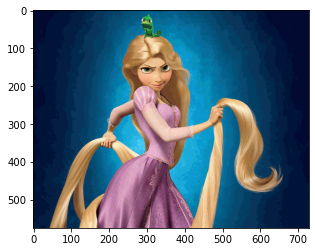

In [290]:
plt.imshow(constructed_image, cmap='gray')
plt.savefig("test10.jpg")